# EDA - Column & Viz

In [27]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Cdf
from empiricaldist import Pmf

In [2]:
bmw = pd.read_csv("BMW Used Car Sales/bmw.csv")

In [3]:
bmw.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

# Target Analysis

In [4]:
target = bmw[["price"]]

Text(0.5, 1.0, 'Prices of cars')

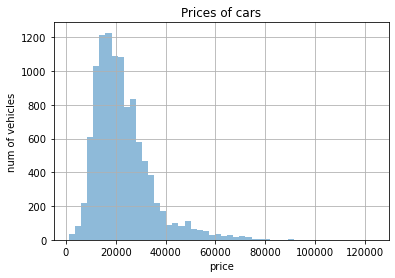

In [5]:
target.price.hist(bins=50, alpha=0.5)

plt.xlabel("price")
plt.ylabel("num of vehicles")
plt.title("Prices of cars")

<AxesSubplot:ylabel='price'>

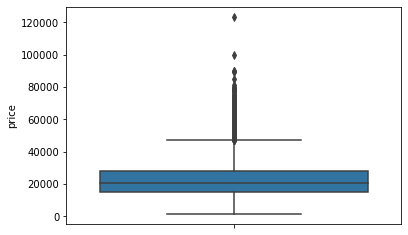

In [6]:
sns.boxplot(y=target.price)

In [7]:
#summary statistics
target.price.describe()

count     10781.000000
mean      22733.408867
std       11415.528189
min        1200.000000
25%       14950.000000
50%       20462.000000
75%       27940.000000
max      123456.000000
Name: price, dtype: float64

In [8]:
models = bmw.groupby(["model"])
models.price.sum()

model
 1 Series    31152869
 2 Series    24013888
 3 Series    48568936
 4 Series    22385926
 5 Series    23799524
 6 Series     2630272
 7 Series     3915038
 8 Series     2495914
 M2            905947
 M3            816204
 M4           5409279
 M5           1675040
 M6            257520
 X1          15932518
 X2           8204159
 X3          15294829
 X4           5857119
 X5          18556760
 X6           4646893
 X7           3841352
 Z3             40785
 Z4           2916209
 i3            802686
 i8            969214
Name: price, dtype: int64

In [17]:
sample = np.random.normal(size=1000)

<AxesSubplot:>

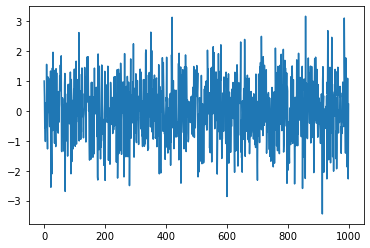

In [37]:
Cdf(sample).plot()

<AxesSubplot:>

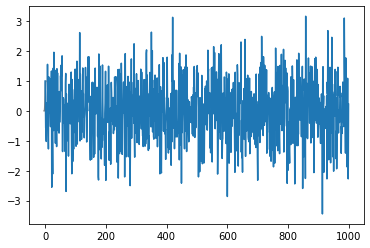

In [40]:
from scipy.stats import norm
xs = np.linspace(-3,3)
ys = norm(0,1).cdf(xs)

plt.plot(xs, ys, color="gray")

Cdf(sample).plot()

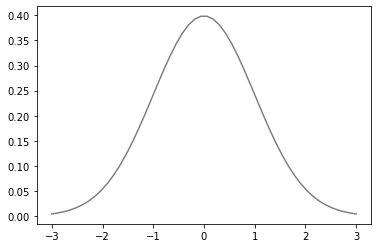

In [41]:
xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color="gray")

<AxesSubplot:ylabel='Density'>

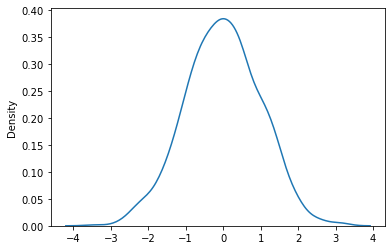

In [43]:
sns.kdeplot(sample)

In [50]:
Cdf(bmw["year"], normalize=True)

TypeError: __init__() got an unexpected keyword argument 'normalize'

In [56]:
a=bmw["year"].value_counts(normalize=True).sort_index().cumsum()

In [66]:
b=pd.DataFrame(a).reset_index()
b.rename(columns={"index":"year", "year":"prob"}, inplace=True)

<AxesSubplot:xlabel='year', ylabel='prob'>

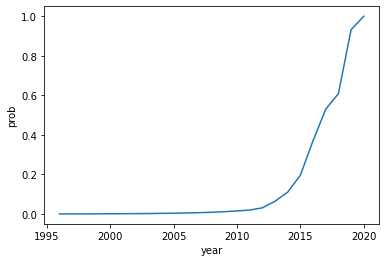

In [67]:
sns.lineplot(data=b, x="year", y="prob")

<AxesSubplot:xlabel='year', ylabel='Density'>

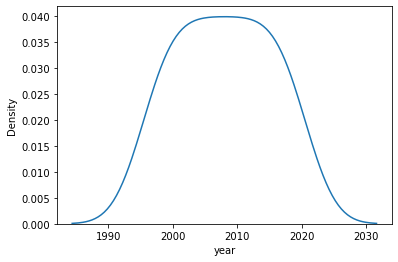

In [68]:
sns.kdeplot(data=b, x="year")